In [38]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew  

db = pd.read_csv('../data/users.dataset.csv')
db.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [39]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

<Axes: ylabel='count'>

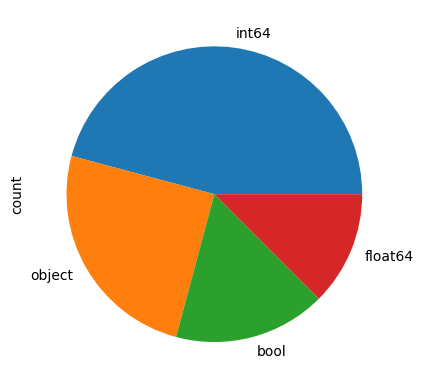

In [40]:
db.dtypes.value_counts().plot.pie()

In [41]:
print(db.isna().sum())

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64


<Axes: >

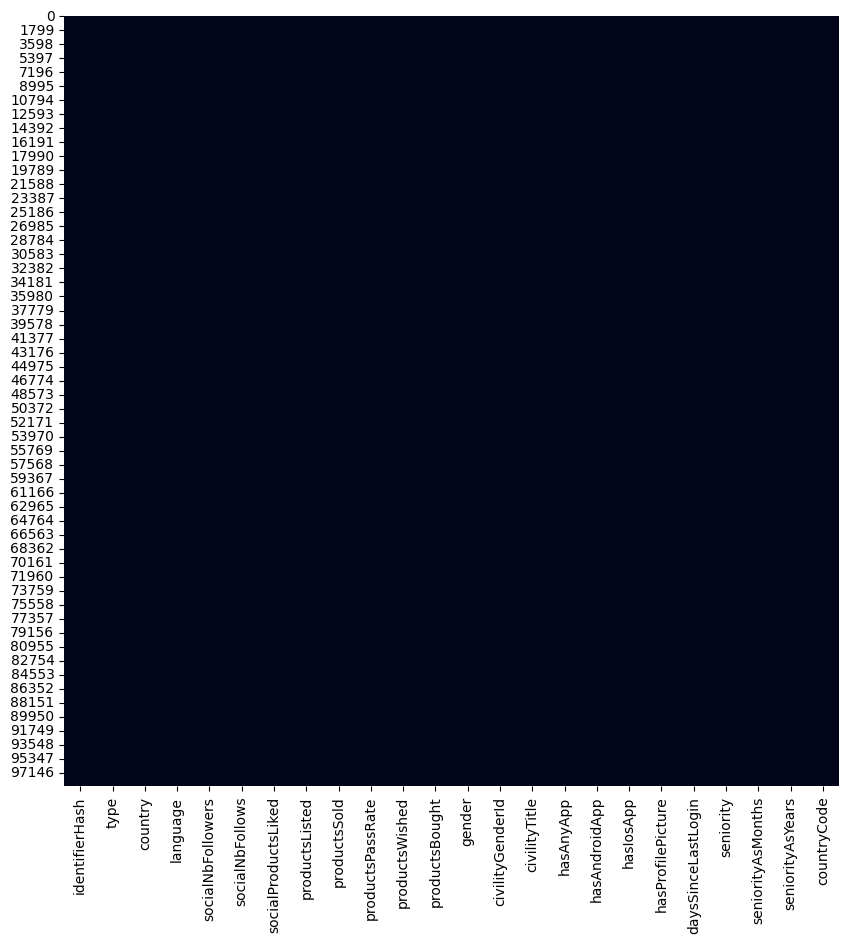

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(db.isna() , cbar=False) 

### 1. skewness

In [43]:
db.select_dtypes(include='number').skew()
# Si Skewness nulle : La distribution est symétrique, avec une répartition équilibrée des données autour de la moyenne.

identifierHash           0.001134
socialNbFollowers       88.816910
socialNbFollows        220.876679
socialProductsLiked    244.157743
productsListed          64.893219
productsSold            41.595633
productsPassRate        10.667299
productsWished          49.256959
productsBought          84.797360
civilityGenderId        -1.140820
daysSinceLastLogin      -1.675425
seniority               -0.427090
seniorityAsMonths       -0.427092
seniorityAsYears        -0.427311
dtype: float64

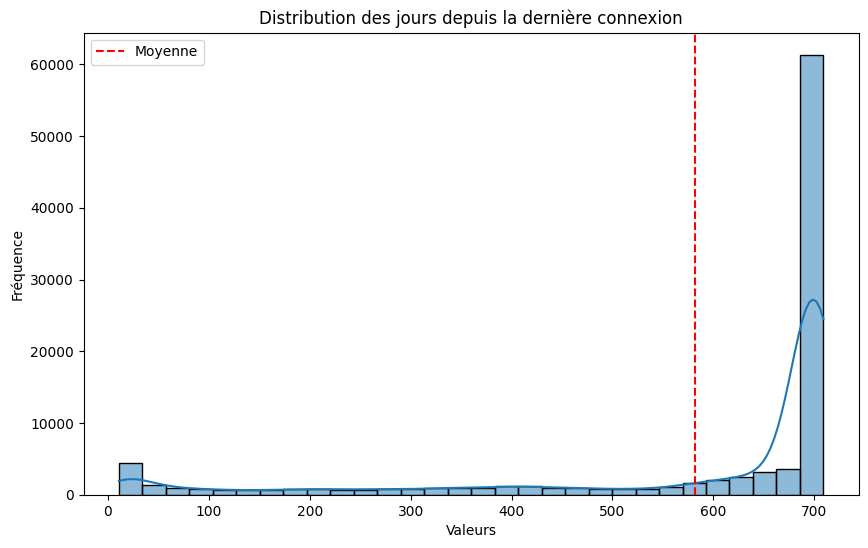

In [44]:
# Visualiser la distribution  
plt.figure(figsize=(10, 6))  
sns.histplot(db['daysSinceLastLogin'], bins=30, kde=True)  
plt.axvline(x=np.mean(db['daysSinceLastLogin']), color='red', linestyle='--', label='Moyenne')  
plt.title('Distribution des jours depuis la dernière connexion')  
plt.xlabel('Valeurs')  
plt.ylabel('Fréquence')  
plt.legend()  
plt.show()  

Text(0.5, 1.0, 'hasAnyApp Bins')

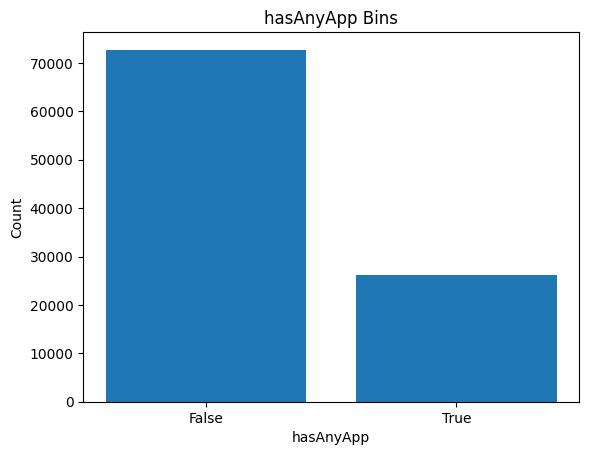

In [45]:
group_names=['False','True']
q=plt.bar(group_names, db['hasAnyApp'].value_counts())

# Utilisateur a déjà utilisé l'une des applications officielles du magasin
plt.xlabel("hasAnyApp")
plt.ylabel("Count")
plt.title("hasAnyApp Bins")

> La plupart des utilisateurs n'ont pas utilisé l'application mobile

In [46]:
df_group_two = db[['hasAnyApp','productsBought','productsSold']]
df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])
df_group_two

C:\Users\User\AppData\Local\Temp\ipykernel_2720\3675444363.py:2: FutureWarning: The provided callable <function sum at 0x0000019C7ED1F4C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_2720\3675444363.py:2: FutureWarning: The provided callable <function mean at 0x0000019C7ED34900> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])


hasAnyApp productsBought           productsSold          
                       sum      mean          sum      mean
0     False           7957  0.109391         3233  0.044447
1      True           9049  0.345725         8794  0.335982

> Les utilisateurs ayant une application achètent et vendent significativement plus de produits par rapport à ceux qui n'en ont pas.

Text(0.5, 1.0, 'civilityTitle Bins')

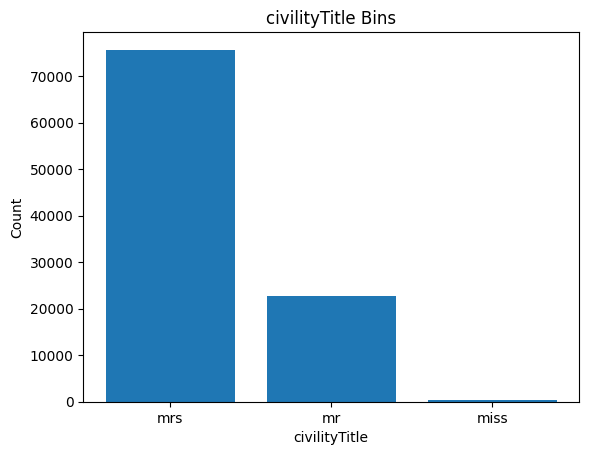

In [47]:
group_names=['mrs','mr','miss']
plt.bar(group_names, height=db['civilityTitle'].value_counts())

# set x/y labels and plot title
plt.xlabel("civilityTitle")
plt.ylabel("Count")
plt.title("civilityTitle Bins")

> Les femmes mariées semblent être les utilisatrices les plus actives de ce site

In [48]:
df_group_one = db[['civilityTitle','productsBought','productsSold']]
df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
df_group_one

C:\Users\User\AppData\Local\Temp\ipykernel_2720\3517141676.py:2: FutureWarning: The provided callable <function sum at 0x0000019C7ED1F4C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_2720\3517141676.py:2: FutureWarning: The provided callable <function mean at 0x0000019C7ED34900> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_2720\3517141676.py:2: FutureWarning: The provided callable <function sum at 0x0000019C7ED1F4C0> is currently using SeriesGroupBy.sum. In a future ve

civilityTitle productsBought           productsSold          
                           sum      mean          sum      mean
0          miss            287  0.656751          574  1.313501
1            mr           4262  0.186995         2673  0.117278
2           mrs          12457  0.164592         8780  0.116009

> Les hommes (mr) et les dames mariées (mrs) semblent plus actifs dans les achats en termes de quantités totales. Toutefois, les mademoiselles montrent une moyenne d'achats et de ventes plus élevée par utilisateur.

Text(0.5, 1.0, 'language Bins')

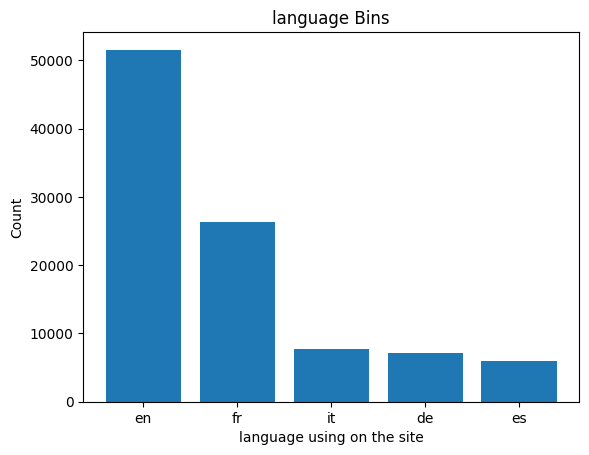

In [49]:
group_names=['en', 'fr', 'it', 'de', 'es']
q=plt.bar(group_names, db['language'].value_counts())

# définir les étiquettes x/y et le titre de l'intrigue
plt.xlabel("language using on the site")
plt.ylabel("Count")
plt.title("language Bins")

In [50]:
df_group_three = db[['language','productsBought','productsSold']]
df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
df_group_three

C:\Users\User\AppData\Local\Temp\ipykernel_2720\95561689.py:2: FutureWarning: The provided callable <function sum at 0x0000019C7ED1F4C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_2720\95561689.py:2: FutureWarning: The provided callable <function mean at 0x0000019C7ED34900> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_2720\95561689.py:2: FutureWarning: The provided callable <function sum at 0x0000019C7ED1F4C0> is currently using SeriesGroupBy.sum. In a future version of

language productsBought           productsSold          
                      sum      mean          sum      mean
0       de           1705  0.237531          539  0.075091
1       en           8918  0.172950         4877  0.094581
2       es            797  0.132107          901  0.149345
3       fr           4386  0.166313         3004  0.113909
4       it           1200  0.154520         2706  0.348442

> La première langue préférée des utilisateurs est l'anglais et la seconde le français. Cependant, ils n'ont pas la moyenne de produits achetés et de produits vendus la plus élevée.

<Axes: xlabel='language', ylabel='count'>

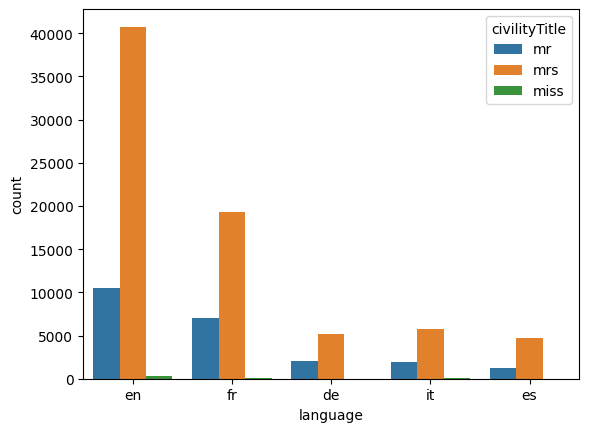

In [51]:
sns.countplot(x='language',data=db,hue='civilityTitle') 

> countplot nous indique qu'il y a plus d'utilisatrices mariées dans le monde.

### 2. Supprimer des variables

In [52]:
repeat_columns = []
# les métadonnées inutilisées et répétées sont supprimées
repeat_columns += ['identifierHash', 'type','country','gender','civilityTitle']
db1=db.drop(repeat_columns,axis=1)
db1.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,en,147,10,77,26,174,74.0,104,1,1,True,False,True,True,11,3196,106.53,8.88,gb
1,en,167,8,2,19,170,99.0,0,0,2,True,False,True,True,12,3204,106.80,8.90,mc
2,fr,137,13,60,33,163,94.0,10,3,2,True,False,True,False,11,3203,106.77,8.90,fr
3,en,131,10,14,122,152,92.0,7,0,2,True,False,True,False,12,3198,106.60,8.88,us
4,en,167,8,0,25,125,100.0,0,0,2,False,False,False,True,22,2854,95.13,7.93,us


### 3. Encoder les variables

In [53]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

string_columns = ['language','countryCode','hasAnyApp','hasAndroidApp','hasIosApp','hasProfilePicture']

for var in string_columns:
    var_cat = db[[var]] # Prend la colonne sous forme de DataFrame
    var_cat_encoded = ordinal_encoder.fit_transform(var_cat) # Applique l'encodage
    var_cat_df = pd.DataFrame(var_cat_encoded) 
    var_cat_df.columns = [var + '_encoded'] 
    db1 = db1.merge(var_cat_df, how = 'inner', left_index = True, right_index = True) 

db2 = db1.drop(string_columns, axis = 1) # Suppression des colonnes textuelles originales
db2.head()
db2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   socialNbFollowers          98913 non-null  int64  
 1   socialNbFollows            98913 non-null  int64  
 2   socialProductsLiked        98913 non-null  int64  
 3   productsListed             98913 non-null  int64  
 4   productsSold               98913 non-null  int64  
 5   productsPassRate           98913 non-null  float64
 6   productsWished             98913 non-null  int64  
 7   productsBought             98913 non-null  int64  
 8   civilityGenderId           98913 non-null  int64  
 9   daysSinceLastLogin         98913 non-null  int64  
 10  seniority                  98913 non-null  int64  
 11  seniorityAsMonths          98913 non-null  float64
 12  seniorityAsYears           98913 non-null  float64
 13  language_encoded           98913 non-null  flo

Text(0.5, 1.0, 'Heatmap of Correlation Matrix for All Users')

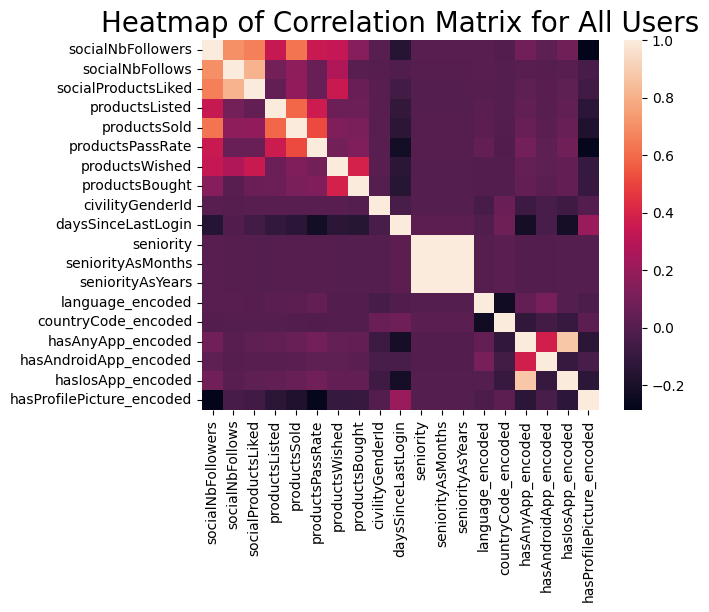

In [54]:
# plt.figure(figsize=(11,11))
a=sns.heatmap(db2.corr()) 
a.set_title('Heatmap of Correlation Matrix for All Users', fontsize = 20)

>Variable <b>daysSinceLastLogin & hasProfilePicture</b> : semblent être négativement corrélées à toutes les autres variables. Cependant, seuls 1,95 % des utilisateurs n’avaient pas de photo de profil.

>Variables <b>socialNbFollowers &socialNBFollows & socialproductsLiked & productsListed & productsSold & productsPassRate & productsWished </b> semblent être positivement liés les uns aux autres.

>La variable <b>seniority</b> ancienneté semble décorrélée à toutes les autres variables.

>Variables <b>language et country</b> semblent être négativement corrélés, ont une corrélation hebdomadaire avec les variables hasAnyApp & hasIosApp & hasAndroidApp ; mais n'ont presque aucune corrélation avec d'autres variables. Pour l’instant, nous pourrions conserver ces variables pour une analyse plus approfondie.

In [55]:
# supprimer les variables sans corrélations
no_columns=['seniority','seniorityAsMonths','seniorityAsYears']

db3 = db2.drop(no_columns, axis = 1)

In [56]:
# sns.pairplot(db3) # parplot aide à obtenir une relation un à un entre tous les attributs de l'ensemble de données

### 4. Exemple de choix pour le dendogramme :
   
Étant donné que cet dataset est trop volumineux pour dessiner un dendrogramme, nous pourrions choisir 30 % des données au hasard.

In [57]:
print("Dataset d'origine avant filtrage", db.shape)
print("Données restantes après filtrage des variables sans corrélations:\n",db3.shape)
db_final = db3.sample(frac = 0.3)
print("\n Colonnes de retrait finales: \n",db_final.columns)
print("\n Données finales de rétrécissement: \n",db_final.shape)


Dataset d'origine avant filtrage (98913, 24)
Données restantes après filtrage des variables sans corrélations:
 (98913, 16)

 Colonnes de retrait finales: 
 Index(['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
       'productsBought', 'civilityGenderId', 'daysSinceLastLogin',
       'language_encoded', 'countryCode_encoded', 'hasAnyApp_encoded',
       'hasAndroidApp_encoded', 'hasIosApp_encoded',
       'hasProfilePicture_encoded'],
      dtype='object')

 Données finales de rétrécissement: 
 (29674, 16)


In [58]:

# import scipy.cluster.hierarchy as sch
# from sklearn.cluster import AgglomerativeClustering
# fig = plt.figure(figsize = (11, 8))
# dendogram = sch.dendrogram(sch.linkage(db_final,method = 'ward'))

>Selon le tracé du dendrogramme, le nombre de clusters recommandées serait de deux. Nous pourrions ensuite segmenter les utilisateurs en deux clusters principaux (Actif/Inactif). Cependant, il semble également que nous regroupions les données en clusters plus petits.

### Correlation between likes and purchases

<Axes: >

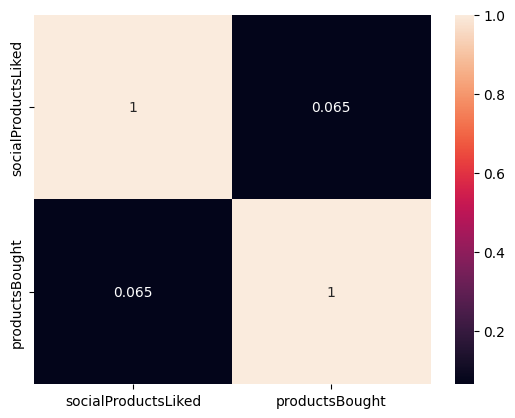

In [59]:
# Correlation between likes and purchases
sns.heatmap(db3[['socialProductsLiked', 'productsBought']].corr(), annot=True)

> Cela signifie que le nombre de produits aimés sur les réseaux sociaux n'a presque aucun lien avec les achats effectués.

## activity of users

<Axes: ylabel='count'>

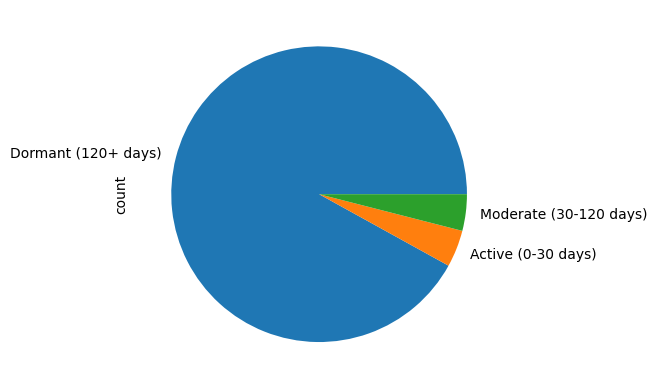

In [60]:
# Activity Segmentation
bins = [-1, 30, 120, np.inf]
labels = ['Active (0-30 days)', 'Moderate (30-120 days)', 'Dormant (120+ days)']
db3['activity_tier'] = pd.cut(db3['daysSinceLastLogin'], bins=bins, labels=labels)
db3['activity_tier'].value_counts().plot.pie()

<Axes: >

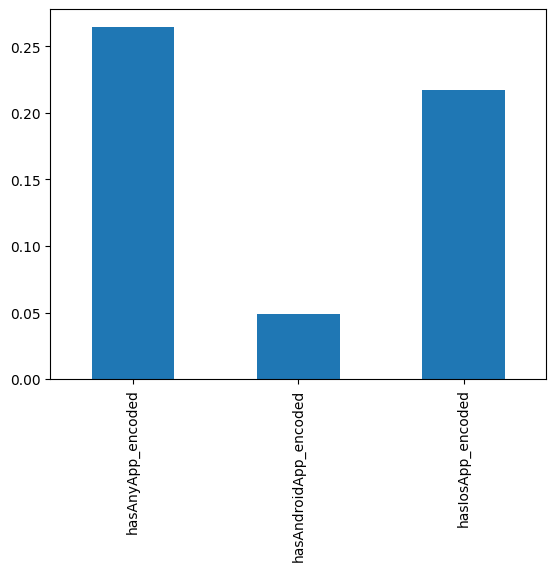

In [61]:
# Platform Preferences
platform_stats = db3.agg({
    'hasAnyApp_encoded': 'mean',
    'hasAndroidApp_encoded': 'mean',
    'hasIosApp_encoded': 'mean'
})
platform_stats.plot(kind='bar')

<Axes: xlabel='hasProfilePicture_encoded'>

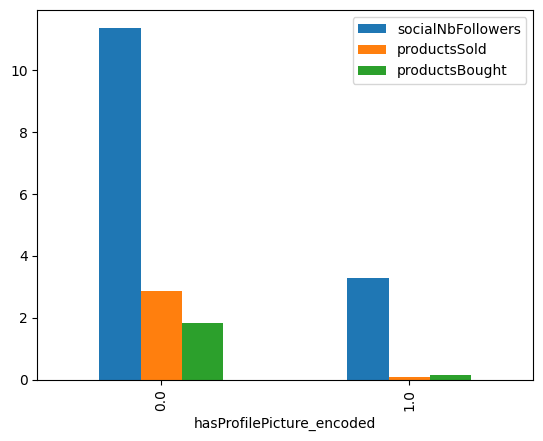

In [62]:
profile_analysis = db3.groupby('hasProfilePicture_encoded').agg({
    'socialNbFollowers': 'mean',
    'productsSold': 'mean',
    'productsBought': 'mean'
}).reset_index()
profile_analysis.plot(kind='bar', x='hasProfilePicture_encoded')

<Axes: ylabel='count'>

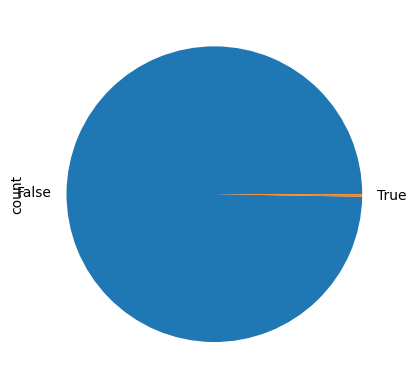

In [63]:
potential_bots = db3[
    (db3['socialNbFollowers'] > db3['socialNbFollowers'].quantile(0.99)) & 
    (db3['productsBought'] < 1) & 
    (db3['daysSinceLastLogin'] > 90)
]
db3['isBot'] = db3.index.isin(potential_bots.index)
db3['isBot'].value_counts().plot.pie()


In [64]:
buyers_db = db3[db3['productsBought'] > 0]
print(f"""In average, buyers buy {buyers_db.productsBought.sum() / buyers_db.shape[0] :.2f} products. Details are as follows:""")

#successful buyers
Sbuyers_db = db3[db3.productsBought >= 3]
Sbuyers_db.dataframeName = "SBuyers"
print("Accordingly, Successful buyers: ", Sbuyers_db.shape[0])

buyers_db.productsBought.describe()

In average, buyers buy 3.14 products. Details are as follows:
Accordingly, Successful buyers:  1277


count    5419.000000
mean        3.138217
std         9.486478
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       405.000000
Name: productsBought, dtype: float64

In [65]:
Sbuyers_db.socialNbFollowers.describe()

count    1277.000000
mean        8.577917
std        10.768492
min         3.000000
25%         4.000000
50%         5.000000
75%         8.000000
max       137.000000
Name: socialNbFollowers, dtype: float64

In [66]:
### actual sellers (at least 1 product sold)
successful_sellers_db = db3[db3.productsSold > 0]
successful_sellers_db.dataframeName = "Actual sellers"
print("Accordingly, Actual sellers: ", successful_sellers_db.shape[0])

Accordingly, Actual sellers:  2036


In [67]:
print(f"""In average, actual sellers sell {successful_sellers_db.productsSold.sum() / successful_sellers_db.shape[0] :.2f} products. Details are as follows:""")
#successful sellers
Ssellers_db = db3[db3.productsSold >= 6]
Ssellers_db.dataframeName = "SSellers"
print("Accordingly, Successful sellers: ", Ssellers_db.shape[0])
successful_sellers_db.productsSold.describe()

In average, actual sellers sell 5.91 products. Details are as follows:
Accordingly, Successful sellers:  458


count    2036.000000
mean        5.907171
std        13.626529
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       174.000000
Name: productsSold, dtype: float64

Customer retention: 70% actual users are active users that have social interaction, these are the group of people that the website should value the most. It also implies that having social connection between sellers and buyers improve the loyalty of users. 3679 users have high potential to transform as actual users since they have strong social interaction.

## Products
% of products meeting the product description. (Sold products are reviewed by the store's team before being shipped to the buyer.) Here, we used variable productsPassRate, the percentage of products meeting the product description (The store's team reviews sold products before being shipped to the buyer.) as a critical metric. We defined sellers with product pass rate greater than and equal to 90% as sellers with the highest quality, sellers with product pass rate greater than and equal to 80% and smaller than 90% as sellers with the medium-high quality, sellers with product pass rate greater than and equal to 60% and smaller than 80% as sellers with the standard quality, sellers with product pass rate smaller than 60% as sellers with low quality.

In [68]:
productsH_db = db3[db3.productsPassRate >= 90]
productsH_db.dataframeName = "Best quality's store"
print("Numbers of sellers with the highest quality: ", productsH_db.shape[0])

productsMh_db = db3[(db3.productsPassRate >= 80) & (db3.productsPassRate < 90)]
productsMh_db.dataframeName = "medium-high quality's store"
print("Numbers of sellers with the Medium-high quality: ", productsMh_db.shape[0])

productsS_db = db3[(db3.productsPassRate >= 60) &  (db3.productsPassRate < 80)]
productsS_db.dataframeName = "Standard qualisty's store"
print("Numbers of sellers with the stadard quality: ", productsS_db.shape[0])

productsU_db = db3[(db3.productsPassRate < 60) &  (db3.productsPassRate > 0)]
productsU_db.dataframeName = "Unqualified store"
print("Numbers of sellers with low quality: ", productsU_db.shape[0]+
      (successful_sellers_db.shape[0]-productsH_db.shape[0]-productsMh_db.shape[0]-productsS_db.shape[0]-productsU_db.shape[0]))

Numbers of sellers with the highest quality:  539
Numbers of sellers with the Medium-high quality:  129
Numbers of sellers with the stadard quality:  174
Numbers of sellers with low quality:  1194


In [69]:

sellers_db = db3[(db3.productsListed > 0) | (db3.productsSold > 0)]
print(f"""In average, active low quality sellers sell {productsU_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active standard quality sellers sell {productsS_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active medium-high quality sellers sell {productsMh_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active high quality sellers sell {productsH_db.productsSold.sum() / sellers_db.shape[0] :.2f} products. Details are as follows:""")
productsH_db.productsSold.describe()

In average, active low quality sellers sell 0.24 
In average, active standard quality sellers sell 0.60 
In average, active medium-high quality sellers sell 0.77 
In average, active high quality sellers sell 2.31 products. Details are as follows:


count    539.000000
mean      11.653061
std       20.687448
min        1.000000
25%        2.000000
50%        4.000000
75%       11.000000
max      170.000000
Name: productsSold, dtype: float64